Ten eerste de belangrijke libraries importeren

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts


De data downloaden en in een dataframe krijgen.

In [4]:
tickers = ['DIS', 'XLI']

def get_data(tickers):  
    prices_df = pd.DataFrame()
    columns_names = []

    for ticker in tickers:
        df = yf.download(ticker, auto_adjust=True, start="2010-1-1", end="2015-1-1")
        new_column = df['Close']
        prices_df = pd.concat([prices_df, new_column], axis=1)
        columns_names.append(ticker)
    prices_df.columns = columns_names
    return prices_df

df = get_data(tickers)

    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Handmatig de beschikbaarheid van de data checken 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2010-01-04 00:00:00 to 2014-12-31 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DIS     1258 non-null   float64
 1   XLI     1258 non-null   float64
dtypes: float64(2)
memory usage: 29.5+ KB


Stap een van aandelen selectie het plotten van de hittegrafiek

<AxesSubplot:>

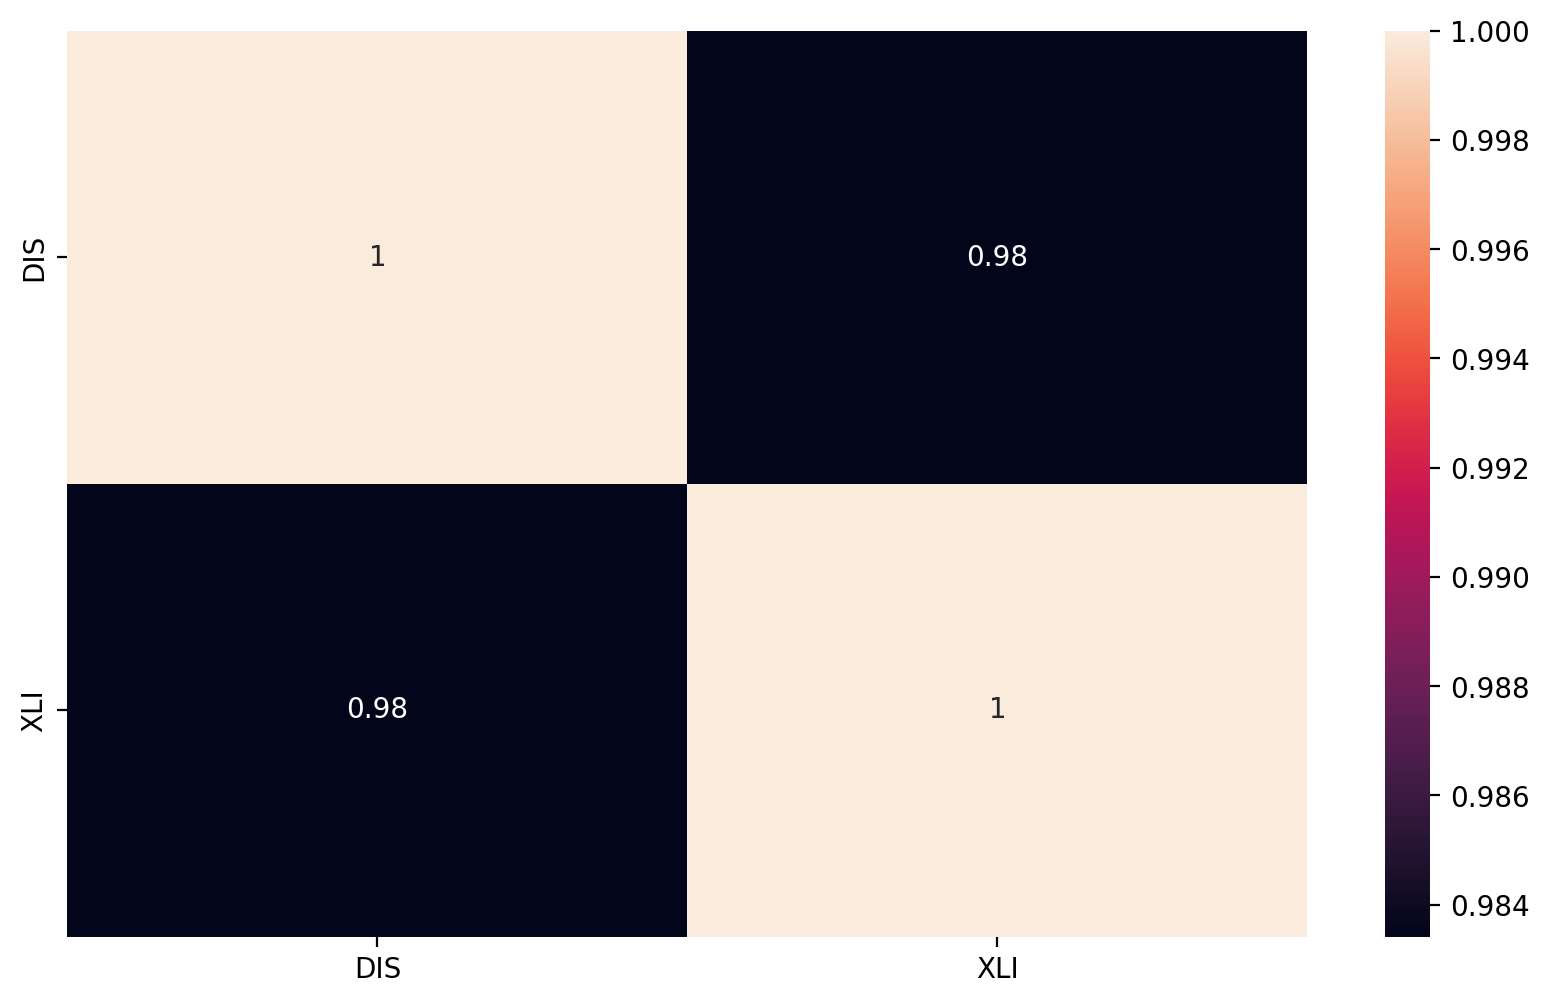

In [6]:
corr = df.corr()
corr

plt.figure(figsize=(10,6), dpi=200)
sn.heatmap(corr, annot=True)

Het plotten van de prijzen van de gekozen aandelen

<AxesSubplot:>

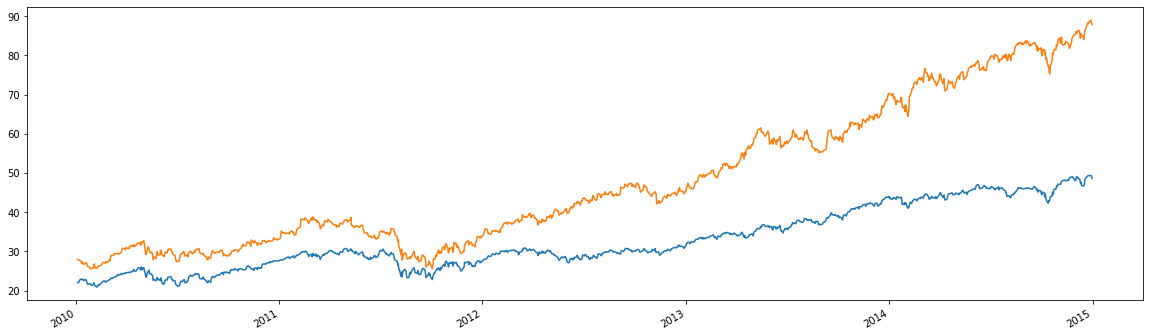

In [9]:
df['XLI'].plot(figsize=(20,6))
df['DIS'].plot(figsize=(20,6))

Lineaire regressie van de eerste volgorde met plot, ofwel stap twee van de aandelen selectie

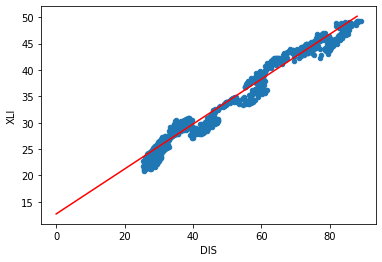

In [11]:
#test eerste volgorde!!
y = df['XLI'].tolist()
x = df['DIS'].tolist()

x = sm.add_constant(x)

results1 = sm.OLS(y, x).fit()
results1.params

df.plot.scatter(x='DIS', y='XLI')
x = np.arange(x.min(), x.max(), 1)
y = x * results1.params[1] + results1.params[0]
plt.plot(y, 'r')
plt.show()


plot prijzen met hedge ratio vermenigvuldigt voor de eerste volgorde

<AxesSubplot:>

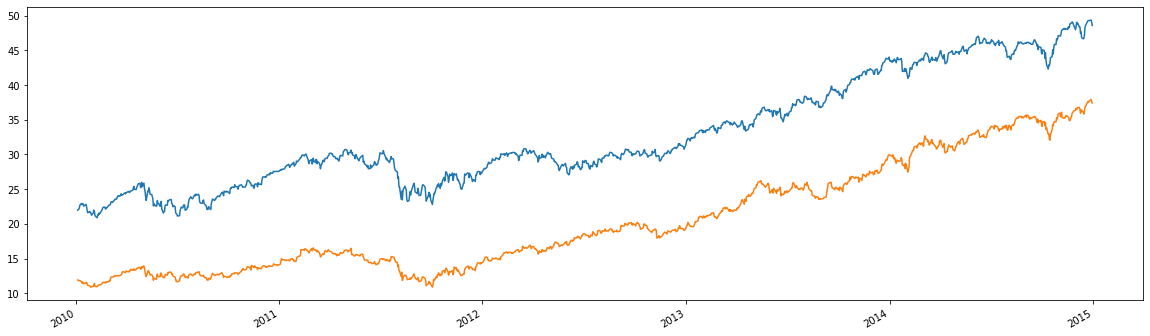

In [13]:
#eerste volgorde!
df['XLI'].plot(figsize=(20,6))
(df['DIS']*results1.params[1]).plot(figsize=(20,6))


berekenen van de spread voor de eerste volgorde, en het plotten. 3e stap van de aandelen selectie

<AxesSubplot:>

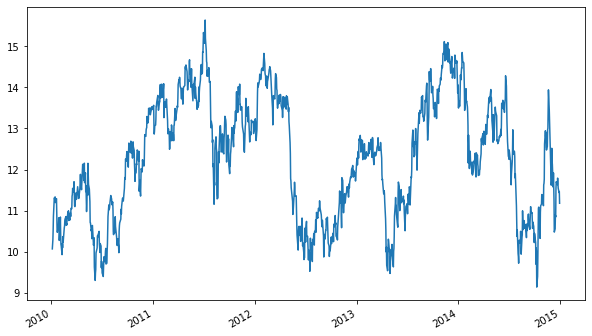

In [14]:
#voor de eerste volgorde
df2 = pd.DataFrame()
df2 = pd.concat([df2, df[['XLI', 'DIS']]])
df2['spread'] = df['XLI'] - results1.params[1] * df['DIS']
df2['spread'].plot(figsize=(10,6))

doen van de adf test voor de eerste volgorde

In [16]:
adf1 = ts.adfuller(df2['spread'])
print(f'ADF:{adf1}')

ADF:(-3.355164911006852, 0.012585621587863962, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, 150.63594694068752)


In [ ]:
Lineaire regressie van de tweede volgorde met plot, ofwel stap twee van de aandelen selectie

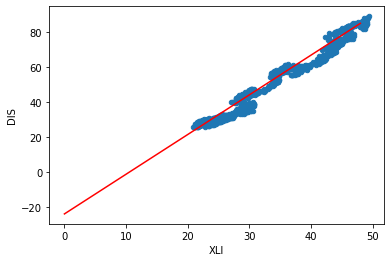

In [5]:
#test tweede volgorde!!
y = df['DIS'].tolist()
x = df['XLI'].tolist()

x = sm.add_constant(x)

results2 = sm.OLS(y, x).fit()
results2.params

df.plot.scatter(x='XLI', y='DIS')
x = np.arange(x.min(), x.max(), 1)
y = x * results2.params[1] + results2.params[0]
plt.plot(y, 'r')
plt.show()


plot prijzen met hedge ratio vermenigvuldigt voor de tweede volgorde

<AxesSubplot:>

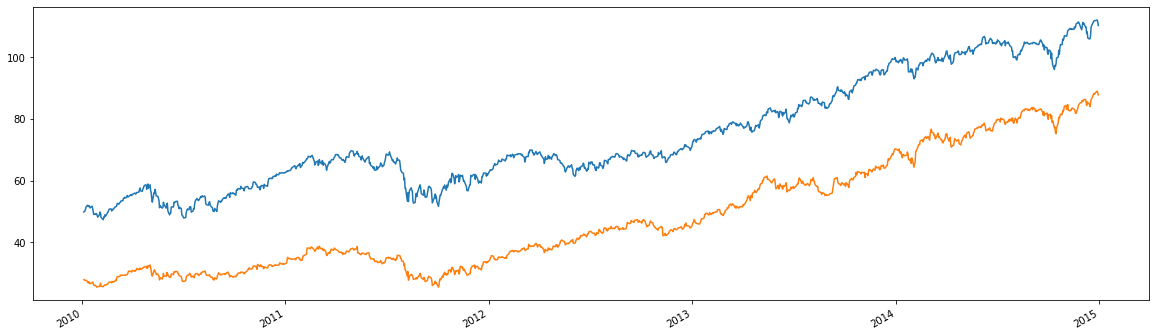

In [18]:
#tweede volgorde!
(df['XLI']*results2.params[1]).plot(figsize=(20,6))
df['DIS'].plot(figsize=(20,6))



berekenen van de spread voor de tweede volgorde, en het plotten. 3e stap van de aandelen selectie

<AxesSubplot:>

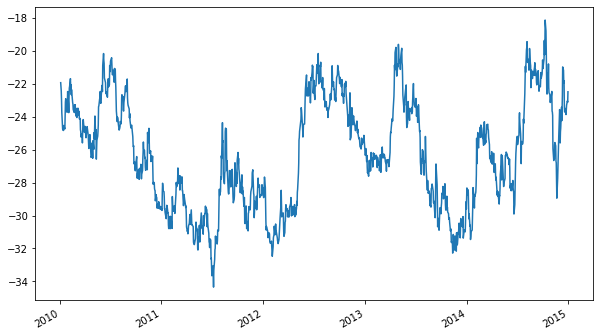

In [33]:
#voor de tweede volgorde
df3 = pd.DataFrame()
df3 = pd.concat([df3, df[['DIS', 'XLI']]])
df3['spread'] = df['DIS'] - results2.params[1] * df['XLI']
df3['spread'].plot(figsize=(10,6))

1257


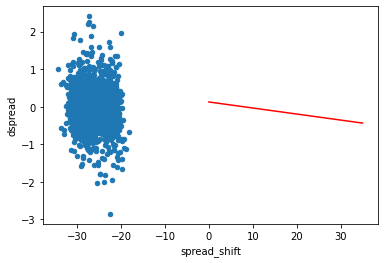

43.15807932620981


In [34]:
df3['spread_shift'] = df3['spread'].shift()
df3['dspread'] = df3['spread'] - df3['spread_shift']

df3 = df3.dropna()
print(len(df3['dspread']))

y = df3['dspread'].tolist()
x = df3['spread_shift'].tolist()

x = sm.add_constant(x)

results3 = sm.OLS(y, x).fit()
results3.params

df3.plot.scatter(x='spread_shift', y='dspread')
x = np.arange(x.min(), x.max(), 1)
y = x * results3.params[1] + results3.params[0]
plt.plot(y, 'r')
plt.show()
halflife = -np.log(2)/results3.params[1]
print(halflife)

doen van de adf test voor de tweede, volgorde

In [20]:
#adf voor de tweede volgorde
adf2 = ts.adfuller(df3['spread'])
print(f'ADF:{adf2}')

ADF:(-4.351676176625007, 0.0003610701639107491, 17, 2498, {'1%': -3.4329705094097114, '5%': -2.8626977267304357, '10%': -2.5673863028421136}, 4369.417169047252)
